### Data Cleaning

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm  
import os

%matplotlib inline

style.use("fivethirtyeight")


In [3]:
# Set working directory
os.chdir('/Users/seominjae/Desktop/RDD/raw')

In [4]:
# Data Loading
class1 = pd.read_csv("Chinese Thermal Comfort Dataset Class I.csv", encoding='unicode_escape')
class2 = pd.read_csv("Chinese Thermal Comfort Dataset Class II.csv", encoding='unicode_escape')
class3 = pd.read_csv("Chinese Thermal Comfort Dataset Class III.csv", encoding='unicode_escape')

In [5]:
# Get the aggregate
thermal = pd.concat([class1, class2, class3], ignore_index=True)
print("total number of samples:", len(thermal))

total number of samples: 41977


In [6]:
# only heating
print(thermal['A4.Season'].unique())
thermal_heating = thermal[thermal['A4.Season'] == 'Winter Season']
print("total heating instances:", len(thermal_heating))

thermal_heating['A5.City'] = thermal_heating['A5.City'].str.replace(' ', '')
thermal_heating['A5.City'] = thermal_heating['A5.City'].str.replace(',', '')

['Winter Season' 'Transition Season' 'Summer Season']
total heating instances: 15992


In [7]:
# Column mappings
column_mappings = {
    'ID': 'id',
    'A1.Code': 'code',
    'A2.Date': 'date',
    'A3.Data Contributor' : 'data contributor',
    'A4.Season' : 'season',
    'A5.City': 'city',
    'A6.Climate Zone': 'climate zone',
    'B1.Building Type': 'building type',
    'B2.Building Function': 'building function',
    'B3.Floors': 'floors',
    'B4.Building Operation Mode':'buidling_operation_mode',
    'B5.Room (Length¡ÁWidth)':'length width',
    'B5.Room Height (m)': 'room height',
    'C1.Sex' : 'sex', 
    'C2.Age' : 'age',
    'C3.Height£¨cm£©': 'height(cm)', 
    'C4.Weight£¨kg£©': 'weight(kg)', 
    'C5.Living Years': 'living years',
    'D1.TSV': 'tsv',
    'D2.TCV': 'tcv',
    'D3.TAV': 'tav',
    'D5.Clothing Insulation (clo)': 'clo',
    'D6.Metabolic Rate (met)': 'met',
    'Measured Height (m)': 'measured height(m)',
    'E1.Indoor Air Temperature (¡æ)': 't_db',
    'E2.Indoor Relative Humidity (%)': 'rh',
    'E3.Indoor Air Velocity (m/s)': 'vel',
    'E4.Globe Temperature (¡æ)': 't_globe',
    'E5.Roof Temperature (¡æ)' : 'roof_temperature',
    'E5.Wall Temperature (¡æ)' : 'wall_temperature',
    'E5.Floor Temperature (¡æ)' : 'floor_temperature',
    'F3.Radiant Temperature Asymmetry (¡æ)' : 'radiant temperature',
    'F4.PMV' : 'pmv' , 
    'F5.PPD' : 'ppd',
    'F1.Operative Temperature (¡æ)': 't_op',
    'F2.Mean Radiant Temperature (¡æ)': 't_mrt',
    'G1.Real-Time Outdoor Temperature (¡æ)': 't_out_realtime',
    'G2.Mean Daily Outdoor Temperature (¡æ)': 't_out_daily',
    'G3.Monthly Mean Outdoor Temperature (¡æ)': 't_out_monthly',
    'G4.7-Day Running Mean Outdoor Temperature (¡æ)': 't_out_7',
    'G4.15-Day Running Mean Outdoor Temperature (¡æ)': 't_out_15',
    'G5.Mean Daily Outdoor Relative Humidity (%)' : 't_out_humidity',
    'G6.Mean Daily Outdoor Air Velocity (m/s)' : 't_out_velocity'
}

# Rename columns using the dictionary
thermal_heating = thermal_heating.rename(columns=column_mappings)

In [8]:
# Mapping latitude
city_to_latitude = {
    'HebeiProvinceHandanCity': 36.6209,
    'HenanProvinceZhengzhouCity': 34.7472,
    'HenanProvinceLuoyangCity': 34.6181,
    'TianjinCity': 39.3434,
    'LiaoningProvinceDalianCity': 38.914,
    'HeilongjiangProvinceHarbinCity': 45.8038,
    'Beijing': 39.9042,
    'JiangsuProvinceChangzhouCity': 31.8107,
    'ShanghaiCity': 31.2304,
    "ShaanxiProvinceXi'anCity": 34.3416,
    'GuangdongProvinceGuangzhouCity': 23.1291,
    'BeijingCity': 39.9042,
    'BaotouCity': 40.6574,
    'Turpan': 42.9513,
    'HubeiProvinceWuhanCity': 30.5928,
    'HunanProvinceChangshaCity': 28.2282,
    'YunnanProvinceKunmingCity': 25.0438,
    'LhasaCity': 29.6525,
    'HenanProvinceJiaozuoCity': 35.2381,
    'SichuanProvinceZigongCity': 29.3416,
    'LiaoningProvinceBenxiCity': 41.2942,
    'HenanProvinceNanyangCity': 32.9907,
    'HainanProvinceSanyaCity': 18.2528,
    'HunanProvinceHengyangCity': 26.8968,
    'ShanxiProvinceLvliangfenyangCity': 37.2586,
    'HenanProvincePingdingshanCity': 33.7352,
    'ShandongProvinceQingdaoCity': 36.0671,
    'FujianProvinceZhenjiangCity': 32.1876,
    'ShandongProvinceYantaiCity': 37.4645,
    'HohhotCity': 40.8183,
    'FujianProvinceFuzhouCity': 26.0745,
    'ShandongProvinceXintaiCity': 35.9009,
    'HenanProvinceKaifengCity': 34.7986,
    'FujianProvinceNanpingCity': 26.6470
}
# How you estimate(and why only January)
city_to_tout = {
    "HebeiProvinceHandanCity": -7.28,  
    "HenanProvinceZhengzhouCity": -5.6,  
    "TianjinCity": -10.97,  
    "LiaoningProvinceDalianCity": -13.44,  
    "HeilongjiangProvinceHarbinCity": -27.75,  
    "Beijing": -10.05,  
    "JiangsuProvinceChangzhouCity": -3,  # Estimated
    "ShanghaiCity": -2.16,  
    "ShaanxiProvinceXi'anCity": -6,  # Estimated
    "GuangdongProvinceGuangzhouCity": 4.98,  
    "BaotouCity": -18,  # Estimated
    "Turpan": -16.5,  
    "HubeiProvinceWuhanCity": -2.53,  
    "HunanProvinceChangshaCity": -1.8,  
    "YunnanProvinceKunmingCity": 0.95,  
    "LhasaCity": -7.02,  
    "HenanProvinceJiaozuoCity": -5.05,  
    "SichuanProvinceZigongCity": 2.19,  
    "LiaoningProvinceBenxiCity": -21.73,  
    "HenanProvinceNanyangCity": -4.81,  
    "HainanProvinceSanyaCity": 13.22,  
    "HunanProvinceHengyangCity": -1.31,  
    "ShanxiProvinceLvliangfenyangCity": -12,  # Estimated
    "HenanProvincePingdingshanCity": -13.79,  
    "ShandongProvinceQingdaoCity": -7.78,  
    "ShandongProvinceYantaiCity": -5,  # Estimated
    "ShandongProvinceXintaiCity": -6,  # Estimated
    "FujianProvinceZhenjiangCity": 3,  # Estimated, assuming a typo and meant for a Fujian city
    "FujianProvinceNanpingCity": 2,  # Estimated
    "HohhotCity": -21.05,  
    "FujianProvinceFuzhouCity": 4.59,
    "HenanProvinceKaifengCity": -6.2,
}

thermal_heating['latitude'] = thermal_heating['city'].map(city_to_latitude)
thermal_heating['t_out'] = thermal_heating['city'].map(city_to_tout)

In [9]:
# Checking missing values for key variables
print(sum(thermal_heating['tcv'].isna()))
print(sum(thermal_heating['tsv'].isna()))
print(sum(thermal_heating['latitude'].isna()))
print(sum(thermal_heating['t_op'].isna()))


1509
0
0
0


In [10]:
numeric_columns = ['t_db', 't_mrt', 'vel', 'rh', 'met', 'clo', 't_op', 'tsv', 't_out_monthly', 't_out_7', 't_out_15', 't_out_daily', 't_out_realtime', 't_globe']
for column in numeric_columns:
    thermal_heating[column] = thermal_heating[column].astype(float)
    
print("total records:", len(thermal_heating))

# 1 TSV without missing values
drop_columns = ['t_op', 'tsv', 'latitude']
thermal_heating_tsv =  thermal_heating.dropna(subset = drop_columns)
print(f"total_samples_tsv", len(thermal_heating_tsv))

thermal_heating_tsv.to_csv('Heating Season_tsv.csv', index=False)

# 2 TSV without missing values
drop_columns = ['t_op', 'tcv', 'latitude']
thermal_heating_tcv =  thermal_heating.dropna(subset = drop_columns)
print(f"total_samples_tcv", len(thermal_heating_tcv))

thermal_heating_tcv.to_csv('Heating Season_tcv.csv', index=False)

Heating_tsv = pd.read_csv("Heating Season_tsv.csv")
Heating_tcv = pd.read_csv("Heating Season_tcv.csv")

total records: 15992
total_samples_tsv 15992
total_samples_tcv 14483


### **Neutral Temperature**
 - Griffith Method

In [11]:
# Assume griffith coefficient = 0.4

# Using tsv
thermal_heating['t_n']  = thermal_heating['t_op'] - thermal_heating['tsv']/0.4
print(thermal_heating['t_n'].head())

# Using tcv
thermal_heating['t_n_1']  = thermal_heating['t_op'] - thermal_heating['tcv']/0.4
print(thermal_heating['t_n_1'].head())

0    23.3
1    23.3
2    20.8
3    20.8
4    20.0
Name: t_n, dtype: float64
0    18.3
1    18.3
2    18.3
3    18.3
4    17.5
Name: t_n_1, dtype: float64


## Regression Analysis
- An average comfort vote of neutral / prohibit analysis : Calculate the Operative temperature at which the greatest number of people will be comfortable

Simple Regression Analysis 
Probit Analysis: 
- Binary variable: (Thermal sensation vote[-1,1] => 1), otherwise 0
- Find the best proper operative temperature

$Thermal Sensation Vote$\
$tsv_{i}$ = $\beta0$ + $\beta1 \times t_{op}{i}$ \
Operative temperature 21°C- 23°C

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


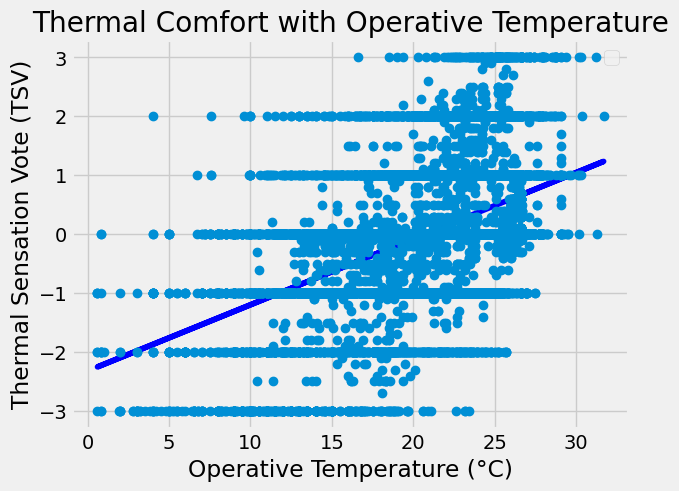

In [46]:
t_op_with_const = sm.add_constant(Heating_tsv['t_op'])
model = sm.OLS(Heating_tsv['tsv'], t_op_with_const).fit()
a = model.params[0]
b = model.params[1]  

tsv_pred = model.predict(t_op_with_const)

plt.errorbar(Heating_tsv['t_op'], Heating_tsv['tsv'], fmt='o', ecolor='r', capsize=5)
plt.plot(Heating_tsv['t_op'], tsv_pred, color='blue')
plt.xlabel('Operative Temperature (°C)')
plt.ylabel('Thermal Sensation Vote (TSV)')
plt.title('Thermal Comfort with Operative Temperature')
plt.legend()
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.432412
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                comfort   No. Observations:                15992
Model:                         Probit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                 0.01773
Time:                        11:09:29   Log-Likelihood:                -6915.1
converged:                       True   LL-Null:                       -7039.9
Covariance Type:            nonrobust   LLR p-value:                 3.100e-56
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2187      0.050      4.368      0.000       0.121       0.317
t_op           0.0381      0.

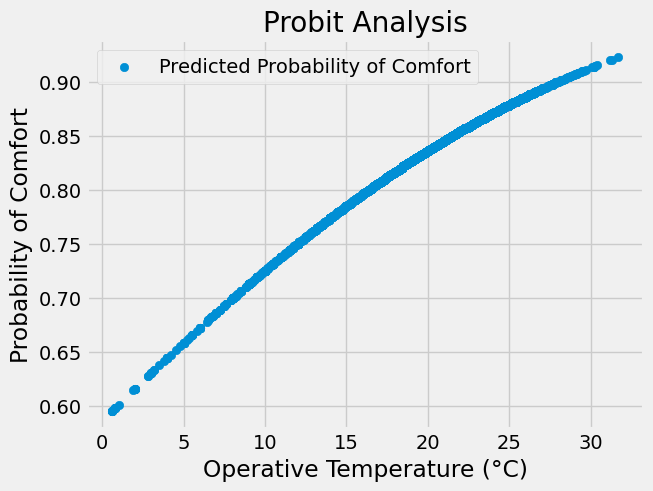

In [16]:
# Probit Analysis

# Binary variable comfort
Heating_tsv['comfort'] = np.where((Heating_tsv['tsv'] >= -1) & (Heating_tsv['tsv'] <= 1), 1, 0)

X = sm.add_constant(Heating_tsv['t_op'])  

y = Heating_tsv['comfort']

probit_model = sm.Probit(y, X).fit()

print(probit_model.summary())

Heating_tsv['comfort_predict'] = probit_model.predict(X)

avg_comfort_prob = Heating_tsv['comfort_predict'].mean()
print(f"Average Thermal Comfort Probability: {avg_comfort_prob:.4f}")


plt.scatter(Heating_tsv['t_op'], Heating_tsv['comfort_predict'], label='Predicted Probability of Comfort')
plt.xlabel('Operative Temperature (°C)')
plt.ylabel('Probability of Comfort')
plt.title('Probit Analysis')
plt.grid(True)
plt.legend()
plt.show()

Average Thermal temberature is between 18 - 20 celsius.

### Regression Discontinuity Plot
- 


### Causal effect 
- Regression Discontinuity
    - Running variable: Latitude of each city in China
    - Assigned 1 if it's latitude is in Northern Part of China, otherwise 0.
    - Check the validity, and bandwidth Selecting Procedure

In [31]:
# Weighted Least Square regressio
rdd_df = thermal_heating.assign(threshold=(thermal_heating["latitude"] > 33).astype(int))
model = smf.wls("t_n~latitude*threshold", rdd_df).fit()
print(f'Treatment group:')
print(model.summary().tables[1])

rdd_df_1 = thermal_heating.assign(threshold=(thermal_heating["latitude"] < 33).astype(int))
model_1 = smf.wls("t_n~latitude*threshold", rdd_df_1).fit()
print(f'Controlled group:')
print(model_1.summary().tables[1])

Treatment group:
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.7271      0.460     66.833      0.000      29.826      31.628
latitude              -0.3912      0.016    -24.654      0.000      -0.422      -0.360
threshold            -13.7400      0.578    -23.771      0.000     -14.873     -12.607
latitude:threshold     0.5017      0.018     27.793      0.000       0.466       0.537
Controlled group:
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.9871      0.350     48.493      0.000      16.300      17.674
latitude               0.1105      0.009     12.839      0.000       0.094       0.127
threshold             13.7400      0.578     23.771      0.000      12.607      14.873
latitude

Text(0.5, 1.0, 'Regression Discontinuity')

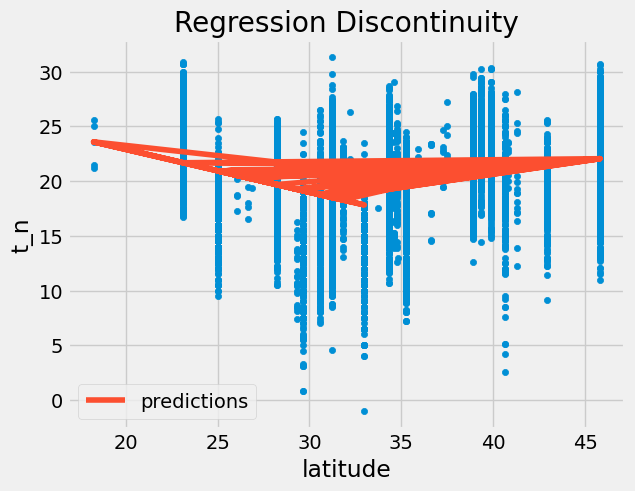

In [32]:
ax = thermal_heating.plot.scatter(x="latitude", y="t_n", color="C0")
thermal_heating.assign(predictions=model.fittedvalues).plot(x="latitude", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity")